# **Unsupervised learning**

In unsupervised learning we provide our algorithms with data and no labels. The hope is the machine learning algorithm can learn on its own and build a data representation. Two main common unsupervised machine learning task are **principal component analysis** and **cluster analysis**. 
We will talk about principal component analysis in this notebook and show you how to implement it on your own using **sklearn**.




In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## **Principal component analysis (PCA)**
### **what is it?**
Principal component analysis is a **dimensionality reduction technique**. Yes I know it sounds kind of big. We will break it down in this notebook.
When we have a dataset with **n** observations (rows) and **p** features/variables (columns), machine learning practitioners say our dataset has **p**-dimensions. When p > n, then we suffer from the **curse of dimensionality**. This is were PCA steps in, it helps to reduce the large number of features into fewer features called **principal components**.
Each principal component is simply a linear combination of the initial features. This combination is done in such a way that the new principal components are not correlated. The technique also ensures that it retains a huge amount of the information in the first principal component. There is a nice blog about PCA [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

**why use PCA?**
1. Sometimes our datasets may contain so many variables (features), some of which may not contribute a lot of information. If you have more variables than observations you run the risk of overfitting your model. PCA helps to reduce complexity. 

2. For better visualization. It is easier to plot a dataset with two features (2D), than a dataset with many features (3D and above).

**How to do PCA?**
1. **Standardize your data**: Remember we standardize data by subtracting the mean and dividing by the standard deviation. We will get a new matrix and let us call it **Z**.

2. **Covariance matrix**: We obtain a covariance matrix by multiplying Z by the transposed form of Z.

3. **We calculate the eigenvectors and eigenvalues**: The eigenvectors are the principal components and the eigenvalues can be thought of as coefficients for the eigenvectors. Each eigenvector has a corresponding eigenvalue. There is a nice video on how to calculate eigenvectors and eigenvalues by hand on [video 1](https://www.youtube.com/watch?v=IdsV0RaC9jM&t=616s) and [video 2](https://www.youtube.com/watch?v=pZ6mMVEE89g).

4. We sort eigenvectors based on eigenvalues. The eigenvector with the highest eigenvalue will be the first principal component and so on.

5. We select the number of principal components to keep. It is recommended to keep as many principal components that will give you atleast 80% variance.

We import our data from sklearn. The iris dataset comes with sklearn to support the learning of machine learning.

In [2]:
data = datasets.load_iris()
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
targets = data.target
print('Different iris species: {}'.format(data.target_names))
print(iris.head())
print(iris.shape)

Different iris species: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)


We standardize our data using Sklearn's Standard scaler

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.data)

The rest of the magic of PCA is easily done for us under the hood by sklearn. The code snippet below performs our principal componet analysis for us in just the first two lines. In the first line we select the number of components to keep using **n_components**. In the second line we obtain our principal components. The third line just helps us see how much variation the selected components explain (about 96%).

In [4]:
pca = PCA(n_components=0.95)
PCs= pca.fit_transform(scaled_data)
pc_var = np.round(pca.explained_variance_ratio_, 2)
#print(pc_var*100)
#print(PCs)
print(data.target_names)

['setosa' 'versicolor' 'virginica']


We visualize our data using the two principal components. We can already see that there seems to be 3 groups in our dataset and this is indeed correct. We have 3 flower types in the iris dataset: versicolor, setosa, virginica.

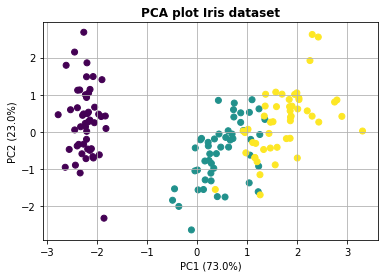

In [5]:
#plt.figure(figsize=(4,4))
plt.scatter(PCs[:, 0], PCs[:, 1], c=data.target)
plt.title('PCA plot Iris dataset', fontweight='bold')
plt.xlabel('PC1 ({}%)'.format(pc_var[0]*100))
plt.ylabel('PC2 ({}%)'.format(pc_var[1]*100))
plt.grid()
plt.show()

**Bonus part**

We will use the PCA to see how much each variable contributes to our selected two principal components. The **loadings** tell us how much each variable contributes to each principal component. We make this even better by making a **correlation matrix** showing how each variable correlates with a particular principal component.

In [6]:
loadings = pca.components_.T
cor_mat = loadings * np.sqrt(pca.explained_variance_)
cor_df = pd.DataFrame(cor_mat, columns=['PC1', 'PC2'], index=data.feature_names)
print(loadings)
print(cor_df)


[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]
                        PC1       PC2
sepal length (cm)  0.893151  0.362039
sepal width (cm)  -0.461684  0.885673
petal length (cm)  0.994877  0.023494
petal width (cm)   0.968212  0.064214


### **What have we learned?**

1. By now you should know what PCA is.
2. You should know why we do PCA.
3. You should know how to do PCA using sklearn.

## Exercise
There is a dataset in sklearn called breast cancer dataset. Practice your PCA knowledge using it and make a visualisation for it. 

**Hint**: you can get this dataset by using **datasets.load_breast_cancer()**.
